In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

# Задание 1
## 1. При помощи функции make_blobs() из модуля sklearn.datasets (см. пример ниже) сгенерировать исходные данные для задачи классификации:
## – матрицу признаков, содержащую по два признака для 500 примеров;
## – массив целевых меток, представляющий два класса.
## Построить график, отображающий распределение классов в пространстве признаков Вывести на печать:
## – размерности массивов признаков и целевых меток;
## – массив уникальных меток классов.

In [ ]:
x, y = make_blobs(500, 2,  centers=2, random_state=3, cluster_std=2.8)

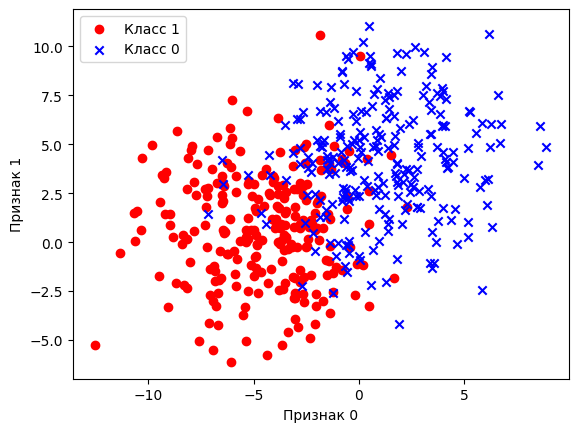

In [ ]:
plt.scatter(x[y==1, 0], x[y==1, 1], color='red', marker='o', label='Класс 1')
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue', marker='x', label='Класс 0')
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend()
plt.show()

In [ ]:
print(f'Размерность массива признаков: {x.shape}\n'
      f'Размерность целевых признаков: {y.shape}\n'
      f'Уникальные метки классов: {np.unique(y)}')

Размерность массива признаков: (500, 2)
Размерность целевых признаков: (500,)
Уникальные метки классов: [0 1]


# Задание 2
## Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности полученных массивов.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=13,
                                                    stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(350, 2) (150, 2) (350,) (150,)


# Задание 3
## Выполнить масштабирование признаков.

In [ ]:
standard_scaler = StandardScaler()

standard_scaler.fit(x_train)

x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

# Задание 4
## Решить задачу классификации с использованием:
## – персептронной модели;
## – модели логистической регрессии;
## – метода опорных векторов.

In [ ]:
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=0)
perceptron.fit(x_train_scaled, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [ ]:
logistic_regression = LogisticRegression(C=1000.0, random_state=0)
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression(C=1000.0, random_state=0)

In [ ]:
svc = SVC(kernel='linear', C=1.0, random_state=0)
svc.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

# Задание 5
## Проверить работу классификатора на тестовых данных. Определить и вывести на печать:
## – число неверно классифицированных образов;
## – средние количества ошибочных классификаций на тренировочных и тестовых данных;
## – "верность" классификации.
## – вероятности принадлежности к различным классам образцов № 10, 20, 100 тестовой выборки (только для модели логистической регрессии).

In [ ]:
y_pred_perceptron = perceptron.predict(x_test_scaled)
y_pred_train_perceptron = perceptron.predict(x_train_scaled)
mean_mistakes_perceptron = ((y_test!=y_pred_perceptron).sum() + (y_train!=y_pred_train_perceptron).sum())/2

print(f'Число неверно классифицированных образов: {(y_test!=y_pred_perceptron).sum()}')
print(f'Срднее количество ошибочных классификаций на тренировочных и тестовых данных: {mean_mistakes_perceptron}')
print(f'Верность классификации: {accuracy_score(y_test, y_pred_perceptron)}')

Число неверно классифицированных образов: 23
Срднее количество ошибочных классификаций на тренировочных и тестовых данных: 41.0
Верность классификации: 0.8466666666666667


In [ ]:
y_pred_log_reg = logistic_regression.predict(x_test_scaled)
y_pred_train_log_reg = logistic_regression.predict(x_train_scaled)
mean_mistakes_log_reg = ((y_test!=y_pred_log_reg).sum() + (y_train!=y_pred_train_log_reg).sum())/2


proba_10 = logistic_regression.predict_proba(x_test_scaled[10, :].reshape(1, -1))
proba_20 = logistic_regression.predict_proba(x_test_scaled[20, :].reshape(1, -1))
proba_100 = logistic_regression.predict_proba(x_test_scaled[100, :].reshape(1, -1))

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_log_reg).sum()}''')
print(f'''Срднее количество ошибочных классификаций на тренировочных и тестовых данных: {mean_mistakes_log_reg}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_log_reg)}''')
print(f'''Вероятность принадлежности к 10 образцу тестовой выборки: {proba_10}''')
print(f'''Вероятность принадлежности к 20 образцу тестовой выборки: {proba_20}''')
print(f'''Вероятность принадлежности к 100 образцу тестовой выборки: {proba_100}''')

Число неверно классифицированных образов: 16
Срднее количество ошибочных классификаций на тренировочных и тестовых данных: 27.0
Верность классификации: 0.8933333333333333
Вероятность принадлежности к 10 образцу тестовой выборки: [[0.11300806 0.88699194]]
Вероятность принадлежности к 20 образцу тестовой выборки: [[0.98491201 0.01508799]]
Вероятность принадлежности к 100 образцу тестовой выборки: [[0.99540962 0.00459038]]


In [ ]:
y_pred_svc = svc.predict(x_test_scaled)
y_pred_train_svc = svc.predict(x_train_scaled)
mean_mistakes_svc = ((y_test!=y_pred_svc).sum() + (y_train!=y_pred_train_svc).sum())/2

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_svc).sum()}''')
print(f'''Срднее количество ошибочных классификаций на тренировочных и тестовых данных: {mean_mistakes_svc}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_svc)}''')

Число неверно классифицированных образов: 17
Срднее количество ошибочных классификаций на тренировочных и тестовых данных: 27.0
Верность классификации: 0.8866666666666667


# Задание 6
## Построить график области решений при помощи функции plot_decision_regions

In [ ]:
def plotDecisionRegions(x, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)
        if test_idx:
            x_test = x[test_idx, :]
            plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0,
                        edgecolor='black', linewidths=1, marker='o', s=120,
                        label='test set')

<ipython-input-13-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


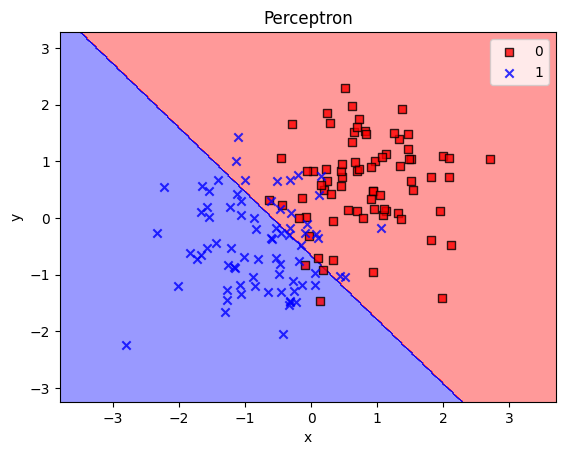

In [ ]:
plotDecisionRegions(x_test_scaled, y_test, perceptron)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Perceptron')
plt.show()

<ipython-input-13-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


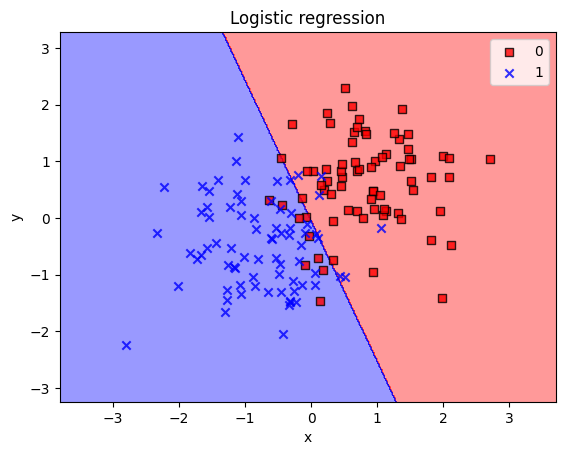

In [ ]:
plotDecisionRegions(x_test_scaled, y_test, logistic_regression)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Logistic regression')
plt.show()

<ipython-input-13-38f04c819822>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


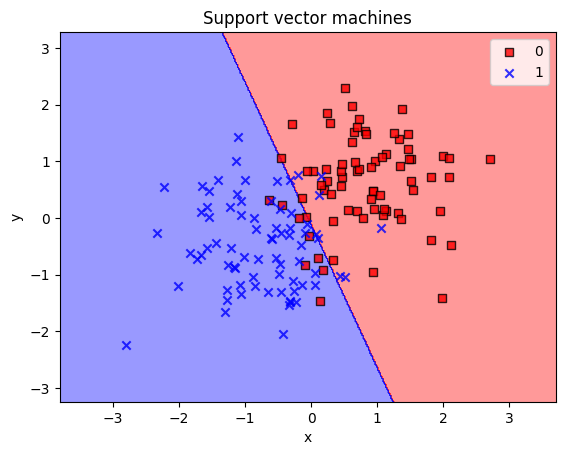

In [ ]:
plotDecisionRegions(x_test_scaled, y_test, svc)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Support vector machines')
plt.show()

В ходе эксперимента были обучены три модели:
- перцептрон
- логистическая регрессия
- метод опорных векторов.

Перцептрон показал худшие результаты по сравнению с двумя другими моделями. Точность распознавания составила 84.6%, в то время как у логистической регрессии она была 89.3%, а у метода опорных векторов - 88.6%.